In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import os

from dotenv import load_dotenv

load_dotenv()


GROQ_API_KEY  = os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

concept of pydantic , (multilevel check in runtme) ?? pls do it also

In [4]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="Gemma2-9b-It")

In [5]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START , END

from IPython.display import Image , display

In [6]:
class State(TypedDict):
    topic : str
    joke : str
    improved_joke : str
    final_joke : str

In [7]:
def generate_joke(state):

    """ First LLM Call to generate Jokes """

    response = llm.invoke(f"Write a short joke about { state['topic'] }")

    return {"joke" : response.content}

In [8]:
def check_punchline(state):

    """ Gate Function to check if the joke has a punchline or not """

    if "?" in state['joke'] or "!" in state['joke'] :
        return "Fail"
    
    return "Pass"

In [9]:
def improve_joke(state):

    """ Second LLM CALL to improve the joke """

    response = llm.invoke(f" Make this joke funnier by adding wordplay : {state['joke']} ")

    return { "improved_joke" : response.content}


In [10]:
def polish_joke(state):

    """ Third LLM CALL to polish the joke """

    response = llm.invoke(f" Add a surprising twist to this joke : {state['improved_joke']} ")

    return { "final_joke" : response.content}


In [11]:
graph_builder = StateGraph(State)

graph_builder.add_node( "generate_joke"  , generate_joke)
graph_builder.add_node( "improve_joke"  , improve_joke)
graph_builder.add_node( "polish_joke"  , polish_joke)

graph_builder.add_edge(START , "generate_joke")
graph_builder.add_conditional_edges(
    "generate_joke" ,
    check_punchline,
    {"Fail" : "improve_joke" , "Pass" : END }
)
graph_builder.add_edge( "improve_joke" , "polish_joke" )
graph_builder.add_edge("polish_joke" , END)

graph = graph_builder.compile()

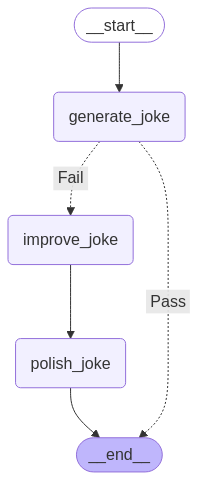

In [12]:
display(
    Image(   
        graph.get_graph().draw_mermaid_png()
    )
)

In [13]:
state = graph.invoke({ "topic" : "Apple"})

In [14]:
state

{'topic': 'Apple',
 'joke': 'Why did the iPhone go to the doctor? \n\nBecause it had a cracked screen!  \n',
 'improved_joke': "Why did the iPhone go to the doctor? \n\nBecause it had a **screen** problem, and it was feeling **app**-alling! \n\n\nLet me know if you'd like to try another joke! 😊 \n",
 'final_joke': 'Here\'s a twist:\n\nWhy did the iPhone go to the doctor? \n\nBecause it had a **screen** problem, and it was feeling **app**-alling!  \n\n*Turns to the doctor and whispers* "But seriously, it\'s just a glitch... I think it might be a **carrier pigeon** issue." \n\n\nLet me know if you want to try another one! 😊 \n'}

In [15]:
print(state.keys())
print(state['final_joke'])

dict_keys(['topic', 'joke', 'improved_joke', 'final_joke'])
Here's a twist:

Why did the iPhone go to the doctor? 

Because it had a **screen** problem, and it was feeling **app**-alling!  

*Turns to the doctor and whispers* "But seriously, it's just a glitch... I think it might be a **carrier pigeon** issue." 


Let me know if you want to try another one! 😊 



# ASSIGNMENT 

code peer review 

coder -> peer (review) -> Manager (doc string final)

code -> review -> generate test cases -> run the test cases -> analyze the failed test cases -> give summary

In [16]:
# pls do the assignment 

# PARALLELIZATION

With parallelization , LLM works simultaneously on a task.

LLMs can sometimes work simultanously on a task and have their outputs aggregated programmatically.
This worklow parallization manifests in two key variations:

Sectioning : Breaking a task into two independant subtasks run in parallel.

Voting : Running the same task multiple times to get diverse output.




In [17]:
class State(TypedDict):

    topic : str
    joke : str
    poem : str
    story : str
    content : str

In [18]:
def call_for_joke(state : State):
    
    """LLM call for joke """

    response = llm.invoke( f" Write a joke about {state['topic']} " )

    return { "joke" : response.content }

def call_for_poem(state : State):
    
    """LLM call for poem """

    response = llm.invoke( f" Write a poem about {state['topic']} " )

    return { "poem" : response.content }

def call_for_story(state : State):
    
    """LLM call for story """

    response = llm.invoke( f" Write a story about {state['topic']} " )

    return { "story" : response.content }

In [19]:
def aggregator(state):

    """ LLM call for combining poem , joke , story """
    
    response = llm.invoke(

        f" I am providing with you story , poem and joke related to {state['topic']} , pls combiend all into to form a content .Here is the deatils Story : {state['story']} , Poem : {state['poem']} and Joke : {state['joke']}"

    )
    
    return { "content" : response.content }

In [20]:
graph_builder = StateGraph(State)

graph_builder.add_node( "call_for_joke" , call_for_joke )
graph_builder.add_node( "call_for_poem" , call_for_poem )
graph_builder.add_node( "call_for_story" , call_for_story )
graph_builder.add_node("aggregator" , aggregator)

graph_builder.add_edge(START , "call_for_joke")
graph_builder.add_edge(START , "call_for_poem")
graph_builder.add_edge(START , "call_for_story")
graph_builder.add_edge("call_for_joke" , "aggregator")
graph_builder.add_edge("call_for_poem" , "aggregator")
graph_builder.add_edge("call_for_story" , "aggregator")
graph_builder.add_edge("aggregator" , END)

graph = graph_builder.compile()

In [21]:
# display(
#     Image(graph.get_graph().draw_mermaid_png())
# )

In [22]:
state = graph.invoke( {"topic" : "Jaguar"} )

In [23]:
print(state.keys())

dict_keys(['topic', 'joke', 'poem', 'story', 'content'])


In [24]:
state

{'topic': 'Jaguar',
 'joke': 'Why did the Jaguar cross the road? \n\nTo prove to the chicken it could be done without roaring! 🚗😹 \n',
 'poem': "A velvet shadow, sleek and low,\nThe jaguar moves, a silent flow.\nThrough emerald leaves, a golden gaze,\nA hunter's instinct, ancient ways.\n\nSpotted coat, a dappled dream,\nA phantom dancer, swift and keen.\nMuscles coiled, a powerful spring,\nA burst of speed, on feathered wing.\n\nThe jungle breathes, a humid sigh,\nAs watchful eyes scan from on high.\nA rustle heard, a tremor slight,\nThe jaguar pounces, in the night.\n\nWith silent grace, a lethal bite,\nA primal power, fierce and bright.\nThe king of beasts, in jungle's hold,\nA story whispered, ages old. \n\nFrom sun-drenched plains to river's flow,\nThe jaguar's spirit, wild and slow.\nA symbol etched, in legend's lore,\nA creature born, to evermore. \n\n\n",
 'story': "The jaguar, named Inti by the villagers, was a creature of legend. His coat, the color of burnt umber, shimmered l

# ROUTING

Routing classifies an input and directs it to a specialized followup task. This workflow allows for 
seperation of concerns , and building more specialized prompts . Without this workflow , optimizing 
for one kind of input can hurt performance on other inputs.

When to use this workflow : Routing works well for complex tasks where there are distinct categories that
are better handled seperately , and where classification can be handled accurately either by LLM or more traditional classification model / algorithm 

eg : let say you have to route mail to the tech team , support team or marketing team.

In [25]:
from typing_extensions import Literal
from pydantic import BaseModel , Field
from langchain_core.messages import HumanMessage , SystemMessage

#schema for structured output to use as a routing logic
class Route(BaseModel):
    step : Literal["pome" , "story" , "joke"] = Field(
        default = None , description = "The next step in the routing process"
    )

# Augment the llm with schema for structured output
router = llm.with_structured_output(Route)

# State
class State(TypedDict):
    input : str
    decision : str
    output : str

# Nodes
def llm_call_story(state : State):
    "Write a story" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }

def llm_call_joke(state : State):
    "Write a joke" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }

def llm_call_poem(state : State):
    "Write a poem" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }


In [26]:
def llm_call_router(state : State):
    "Route the input to the apprpriate node"

    decision = router.invoke(
        [
            SystemMessage(
                content = "Route the input to story,joke , or poem based on the user's request"
            ),
            HumanMessage(content=state["input"])
        ]
    )

    return {"decision" : decision.step}


In [27]:
# Conditional edge function route to the appropriate node
def route_decision(state : State):
    "Return the node name you want to visit next"
    if state["decision"] == "story":
        return "llm_call_story"
    elif state["decision"] == "poem":
        return "llm_call_poem"
    else:
        return "llm_call_joke"

In [28]:
router_builder = StateGraph(State)

router_builder.add_node("llm_call_joke" , llm_call_joke)
router_builder.add_node("llm_call_story" , llm_call_story)
router_builder.add_node("llm_call_poem" , llm_call_poem)
router_builder.add_node("llm_call_router" , llm_call_router)

router_builder.add_edge(START , "llm_call_router")
router_builder.add_conditional_edges(
    "llm_call_router",route_decision,
    {
        # Name returned by route decision : name of next node to visit
        "llm_call_story" : "llm_call_story" ,
        "llm_call_poem" : "llm_call_poem" ,
        "llm_call_joke" : "llm_call_joke"
    }
)

router_builder.add_edge("llm_call_joke" , END)
router_builder.add_edge("llm_call_poem" , END)
router_builder.add_edge("llm_call_story" , END)

In [29]:
router_graph = router_builder.compile()

In [30]:
# display(
#     Image(router_graph.get_graph().draw_mermaid_png())
# )

In [31]:
state = router_graph.invoke({"input" : "Write a joke about cats"})
print(state["output"])

Why don't cats play poker in the jungle? 

Too many cheetahs!  😹 



# Orchestrator - Worker

In the orchestrator-worker's workflow , a central LLM dynamically breaks down tasks , delegates them to worker LLMS , and synthesize their results.

When to use this workflow : This workflow is well suited for complex tasks where you can't predict the subtasks needed.
(in coding , for example the number of files that need to be changed and the nature of change in each file likely depend on the task). Where it's topographically similar , the key differences from parallelization is its flexibility-subtasks are not predefined , but determined by orchestrator based on the specifi input.

orchestrator (break down the task into subtask )-> subtask -> Synthesizer (combine all the task)

In [32]:
from typing import Annotated , List
import operator

class Section(BaseModel):
    name : str = Field(
        description="Name for this section of the report"
    )
    description : str = Field(
        description="Brief overview of the main topics and concepts to be covered in this section"
    )

class Sections(BaseModel):
    sections : List[Section] = Field(
        description="Sections of the report"
    )

planner = llm.with_structured_output(Sections)

# Creating Workers in LangGraph

Because Orchestrator-worker workflows are common , LangGraph has the SEND Api to support this. It lets you dynamically 
create worker nodes and send each one a specific input . Each worker has its own state , and all workers output are written to a shared state key that is accessible to the orchestrator graph . This gives the orchestrator access to all 
worker output and allows it to synthesize them into a final output.As you can see below , we iterate over a list of sections and send each to a Worker node.

In [33]:
from langgraph.constants import Send

# Graph state 
class State(TypedDict):
    topic : str # Report topic
    sections : list[Section] # List of report sections
    completed_sections : Annotated[
        list , operator.add
    ] # all workers write to this key in parallel
    final_report : str # Final report

# Worker State 
class WorkerState(TypedDict):
    section : Section
    completed_sections : Annotated[ list , operator.add ]

In [34]:
# Nodes

def orchestrator(state : State):

    """Orchestrator that generates a plan for the report"""

    # Generate queries
    report_sections = planner.invoke(
        [
            SystemMessage(content="Generate a plan for the report"),
            HumanMessage(content=f"Here is the report topic : { state['topic'] }" ) 
        ]
    )

    print(report_sections)

    return { "sections" : report_sections.sections}

In [35]:
def llm_call(state : WorkerState):

    """Worker writes a section of the report"""

    # Generate section

    section = llm.invoke(
        [

            SystemMessage(content = " Write a report section following the provided name and description.Includes no preamble for each section"),
            HumanMessage(content=f"Here is the section name : {state['section'].name} and description {state['section'].description} ")

        ]
    )

    print(section)

    return {"completed_sections" : [section.content]}


In [36]:
def synthesizer(state : State):

    "Synthesize full report from sections"

    # list of completed sections
    completed_sections = state["completed_sections"]

    # Format completed sections to str to use as context for final sections
    completed_report_sections = "\n\n--\n\n".join(completed_sections)

    return {"final_report" : completed_report_sections}


In [37]:
# Conditional edge function to create llm_call workers that each write a section of the report
def assign_workers(state : State):

    "Assign a worker to each section in the plan"

    # kick-off section writing in parallel via SEND() API

    print("Assigning workers")
    
    return [ Send ("llm_call" , {"section" : s} ) for s in state["sections"]  ]

In [38]:
orchestrator_worker_builder = StateGraph(State)

# add the nodes 
orchestrator_worker_builder.add_node("orchestrator",orchestrator)
orchestrator_worker_builder.add_node("llm_call",llm_call)
orchestrator_worker_builder.add_node("synthesizer",synthesizer)

orchestrator_worker_builder.add_edge(START , "orchestrator")
orchestrator_worker_builder.add_conditional_edges(
    "orchestrator",assign_workers,["llm_call"]
)
orchestrator_worker_builder.add_edge("llm_call" , "synthesizer")
orchestrator_worker_builder.add_edge("synthesizer",END)

In [39]:
orchestrator_worker = orchestrator_worker_builder.compile()

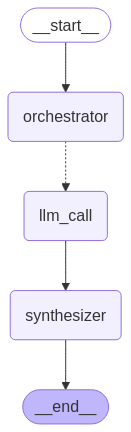

In [40]:
display(
    Image(
        orchestrator_worker.get_graph().draw_mermaid_png()
    )
)

In [41]:
state = orchestrator_worker.invoke({"topic" : "Create a report on agentic ai RAGS"})

sections=[Section(name='Introduction', description='Introduction to Agentic AI'), Section(name='RAGS', description='RAGS: A Deep Dive'), Section(name='Applications', description='Applications of Agentic AI'), Section(name='Ethics', description='Ethical Considerations'), Section(name='Future', description='Future Directions')]
Assigning workers
content='## Future Directions\n\nThis research lays the groundwork for future investigations in several promising directions.  First, the current study focused on [specific area of focus]. Expanding this research to encompass [related areas] would provide a more comprehensive understanding of [broader topic]. \n\nSecond, while this study demonstrated the effectiveness of [method or approach], further exploration is warranted to assess its applicability in diverse contexts.  This includes investigating its effectiveness across [different populations, settings, or situations].  \n\nThird, future research could delve deeper into the underlying mecha

In [42]:
from IPython.display import Markdown
# Markdown(state["final_report"])   # to get in better format
state["final_report"]

'## Introduction to Agentic AI\n\nAgentic AI refers to artificial intelligence systems designed to act autonomously and proactively in their environment. Unlike traditional AI systems that primarily respond to specific inputs, agential AI possesses the ability to set its own goals, make independent decisions, and take actions to achieve those goals. \n\nThis autonomy stems from several key characteristics:\n\n* **Goal-Oriented:** Agentic AI systems are driven by predefined or learned objectives. \n* **Perceptive:** They can gather information about their surroundings through sensors or data feeds, allowing them to understand their context.\n* **Decision-Making:** They employ sophisticated algorithms to analyze information, evaluate options, and make choices that contribute to goal achievement.\n* **Actionable:** Agentic AI can directly interact with the environment, executing actions based on its decisions.\n\nThis combination of capabilities enables agential AI to exhibit behavior rem

# EVALUATOR - OPTIMIZER 

In the evaluation-optimizer workflow , one LLM generates a response while another provides evaluation and feedback in a loop.

When to use this workflow : This workflow is particularly effective when we have clear evaluation creteria ,and iterative refinement provides measurable value . The two signs of good fit are , first , that LLM responses can be 
demonstrably improved when a human articulates their feedback ; and second , that the LLM can provide such feedback .
This is analogous to the iterative writing process a human writer might go through when producing a polished document.

In [43]:
# Graph State 

class State(TypedDict):

    topic : str
    mail_content : str
    feedback : str
    spam_or_not : str  # this is our evaluation criteria


# Schema for structured output to use in evaluation
class Feedback(BaseModel):

    grade : Literal[ "spam" , "not_spam" ] = Field(
        description="Decide if mail_content is spam or not "
    )

    feedback : str = Field(
        description="If the mail_content is spam , provide feedback on how to improve it."
    )

# Augment the LLM with schema for structured output
evaluator = llm.with_structured_output(Feedback)

In [44]:
# Nodes 
def llm_call_generator(state : State):

    "LLM generates a mail content"

    print("Hi i am here in the generator")

    if state.get("feedback"):
        response = llm.invoke(
            f"Write a mail_content related to {state['topic']} but take into account the feedback : {state['feedback']}"
        )
    else:
        response = llm.invoke(f"Write a mail_content related to {state['topic']}")
    
    return {"mail_content" : response.content}


def llm_call_evaluator(state : State):

    "LLM evaulates the mail_content"

    print("Hi i am here in the evaluator")

    evaluation = evaluator.invoke(f"Classify the mail_content : {state['mail_content']} ")

    return {"spam_or_not" : evaluation.grade , "feedback" : evaluation.feedback}


In [45]:
# Conditional Edge function to route back to mail generator or end based upon the feedback from evaluator

def route_path(state : State):

    """route back to mail generator or end based upon the feedback from evaluator"""

    if state["spam_or_not"] == "not_spam":
        return "Accepted"
    
    return "Rejected + Feedback"



In [46]:
optimizer_builder = StateGraph(State)

optimizer_builder.add_node("llm_call_generator" , llm_call_generator)
optimizer_builder.add_node("llm_call_evaluator" , llm_call_evaluator)

optimizer_builder.add_edge(START , "llm_call_generator")
optimizer_builder.add_edge("llm_call_generator","llm_call_evaluator")
optimizer_builder.add_conditional_edges(
    "llm_call_evaluator",
    route_path,
    {
        "Accepted" : END,
        "Rejected + Feedback" : "llm_call_generator"
    }
)

optimizer_workflow = optimizer_builder.compile()

In [47]:
# display(
#     Image(
#         optimizer_workflow.get_graph().draw_mermaid_png()
#     )
# )

In [48]:
state = optimizer_workflow.invoke({ "topic" : "Hey i want to advertise for Car , write me a mail related to it" })


Hi i am here in the generator
Hi i am here in the evaluator
Hi i am here in the generator
Hi i am here in the evaluator
Hi i am here in the generator
Hi i am here in the evaluator


In [49]:
state

{'topic': 'Hey i want to advertise for Car , write me a mail related to it',
 'mail_content': "Subject: Advertise Your Car with [Your Company Name] for Maximum Reach!\n\nHey [Name],\n\nLooking to sell your car quickly and easily?  \n\n[Your Company Name] is here to help! We offer comprehensive car advertising solutions that get your vehicle seen by the right buyers. \n\nHere's what we can do for you:\n\n* **Professional High-Quality Photos:**  Showcase your car's best features with stunning photos that attract attention.\n* **Compelling Descriptions:**  We'll craft engaging descriptions that highlight your car's unique selling points and appeal to potential buyers.\n* **Strategic Listing:** We'll list your car on top automotive marketplaces and websites to reach a wider audience.\n* **Buyer Screening:**  We'll help you connect with serious buyers who are genuinely interested in your car.\n* **Pricing Guidance:**  Our experts can provide valuable insights on pricing your car competitive

# Human in the Loop

Review for Human in the loop , we often want to see our graph output as its running.

We laid the foundations for this with running.



Three main purpose : 

1.Approval (Interrupt the agent at any point of time and give feedback if any) : We can interrupt our agent , surface state to a user , and allow the user to accept an action.

2.Debugging (To check the entire graph , how is the flow of execution) : We can rewind the reproduce or avoid issues.

3.Editing : You can modify the state.


LangGraph offers several ways to get or update agent state to support various human-in-the-loop workflows.

In [50]:
def add(a : int ,b : int) -> int:


    """ Add a and b

    Args :

    a : first int
    b : second int
    
    """

    return a + b

def multiply(a : int ,b : int) -> int :

    """ Multiply a and b

    Args :

    a : first int
    b : second int
    
    """

    return a * b

def divide(a : int , b : int) -> int :

    """ Divide a by b

    Args :

    a : first int
    b : first int

    """

    return a / b

def sqrt(a : int ) -> int :

    """ Multiply a and a

    Args :

    a : first int

    """

    return a * a

In [52]:
tools = [add , multiply , divide , sqrt]

llm_with_tools = llm.bind_tools(tools)

In [60]:
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages , AnyMessage
from langchain_core.messages import AIMessage , HumanMessage
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


In [61]:

class MessageState(TypedDict):
    messages : Annotated[ list[AnyMessage] , add_messages]

def tool_calling_llm(state : MessageState):
    return { "messages" : [ llm_with_tools.invoke( state["messages"] ) ] }
